# 5) Data Analytics II 
1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset. 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [9]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [13]:
df.shape

(400, 5)

In [16]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [18]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [19]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

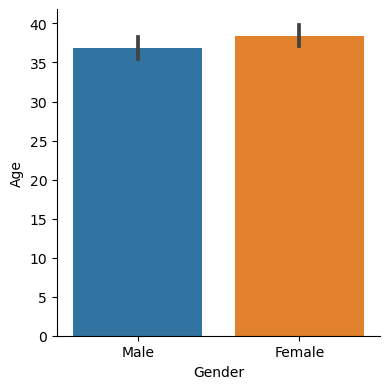

In [32]:
sns.catplot(x='Gender',y='Age',data=df,kind="bar",height=4)
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


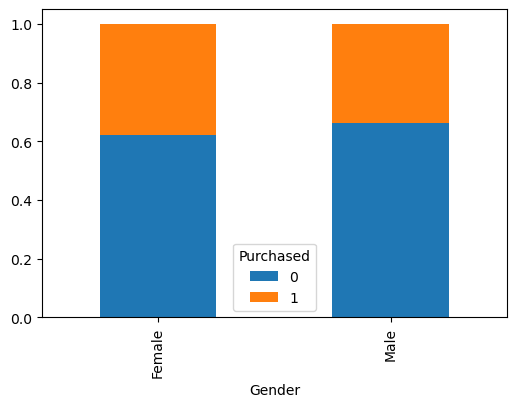

In [109]:
g = pd.crosstab(df.Gender,df.Purchased,normalize='index')
print(g)
g.plot.bar(figsize=(6,4),stacked=True)
plt.show()

In [52]:
import sklearn

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [78]:
X=df[['Age','EstimatedSalary']]
y=df[['Purchased']]

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training and testing split was successful.","\n")
     

model = LogisticRegression()

model.fit(X_train,y_train)
print("Training_Accuracy: ",model.score(X_train,y_train)*100,"\n")

Training and testing split was successful. 

Training_Accuracy:  64.0625 



C:\Users\rhutu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
y_predict = model.predict(X_test)
print("Testing_Accuracy: ",model.score(X_test,y_test)*100,"\n")

Testing_Accuracy:  65.0 



In [104]:
conf_matrix=confusion_matrix(y_test,y_predict)
print("confusion_matrix: \n",conf_matrix,"\n")

confusion_matrix: 
 [[52  0]
 [28  0]] 



In [103]:
Acc = accuracy_score(y_test,y_predict)
print("Accuracy_Score: ",Acc,"\n")

Accuracy_Score:  0.65 



In [99]:
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
TN = conf_matrix[0,0]
FN = conf_matrix[1,0]

In [101]:
print("True_Positive: ",TP,"\n")
print("False_Positive: ",FP,"\n")
print("True_Negatives: ",TN,"\n")
print("False_Negatives: ",FN,"\n")

True_Positive:  0 

False_Positive:  0 

True_Negatives:  52 

False_Negatives:  28 



In [102]:
Error = 1- Acc
print("Error rate",Error,"\n")

Error rate 0.35 



In [106]:
Precision = precision_score(y_test,y_predict)
print("Precision_Score : ",Precision,"\n")

Precision_Score :  0.0 



C:\Users\rhutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
Recall =recall_score(y_test,y_predict)
print("Recall_score: ",Recall,"\n")

Recall_score:  0.0 



In [116]:
from sklearn.metrics import classification_report

In [120]:
cr = classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\rhutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
